In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
PurchaseID                           41476 non-null int64
PurchaseTimestamp                    41476 non-null int64
PurchaseDate                         41476 non-null object
Auction                              41432 non-null object
VehYear                              41432 non-null float64
Make                                 41432 non-null object
Color                                41432 non-null object
Transmission                         41432 non-null object
WheelTypeID                          41432 non-null object
WheelType                            41380 non-null object
VehOdo                               41432 non-null float64
Nationality                          41432 non-null object
Size                                 41432 non-null object
TopThreeAmericanName                 41432 non-null object
MMRAcquisitionAuctionAveragePrice    41416 non-null object
MMRAcq

#### (1) What is the proportion of cars who can be classified as a “kick”?

In [12]:
print(df['IsBadBuy'].mean())

0.1294965763333012


#### (2) Did you have to fix any data quality problems? Detail them

In [8]:
# Convert to float...  
# print(df.info())

collection = ["MMRAcquisitionAuctionAveragePrice",
              "MMRAcquisitionAuctionCleanPrice",
              "MMRAcquisitionRetailAveragePrice",
              "MMRAcquisitonRetailCleanPrice",
              "MMRCurrentAuctionAveragePrice",
              "MMRCurrentAuctionCleanPrice",
              "MMRCurrentRetailAveragePrice",
              "MMRCurrentRetailCleanPrice",
              "MMRCurrentRetailRatio"]

for c_name in collection:
    df[c_name] = df[c_name].mask(df[c_name] == "?", 0)
    df[c_name] = df[c_name].mask(df[c_name] == "#VALUE!", 0)
    df[c_name] = pd.to_numeric(df[c_name])
    df[c_name] = df[c_name].mask(df[c_name] == 1, 0)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
PurchaseID                           41476 non-null int64
PurchaseTimestamp                    41476 non-null int64
PurchaseDate                         41476 non-null object
Auction                              41432 non-null object
VehYear                              41432 non-null float64
Make                                 41432 non-null object
Color                                41432 non-null object
Transmission                         41432 non-null object
WheelTypeID                          41432 non-null object
WheelType                            41380 non-null object
VehOdo                               41432 non-null float64
Nationality                          41432 non-null object
Size                                 41432 non-null object
TopThreeAmericanName                 41432 non-null object
MMRAcquisitionAuctionAveragePrice    41416 non-null float64
MMRAc

In [9]:
# The cells without a year is missing almost everything (affect 44 rows). This codes allow us to see them:
c_name = "VehYear"
df[c_name] = df[c_name].fillna(0).astype(int)
print(df.loc[df[c_name] == 0])

# ... and drop them
df = df[df[c_name] != 0]

       PurchaseID  PurchaseTimestamp      PurchaseDate Auction  VehYear Make  \
20512       20512         1279065600  14/07/2010 10:00     NaN        0  NaN   
20513       20513         1279065600  14/07/2010 10:00     NaN        0  NaN   
20514       20514         1279065600  14/07/2010 10:00     NaN        0  NaN   
20515       20515         1279065600  14/07/2010 10:00     NaN        0  NaN   
20516       20516         1279065600  14/07/2010 10:00     NaN        0  NaN   
20676       20676         1286496000   8/10/2010 10:00     NaN        0  NaN   
20677       20677         1286496000   8/10/2010 10:00     NaN        0  NaN   
20678       20678         1286928000  13/10/2010 10:00     NaN        0  NaN   
20679       20679         1286928000  13/10/2010 10:00     NaN        0  NaN   
20680       20680         1286928000  13/10/2010 10:00     NaN        0  NaN   
20681       20681         1286928000  13/10/2010 10:00     NaN        0  NaN   
20682       20682         1286928000  13

In [10]:
# Rename 'Manual' to 'MANUAL'
c_name = "Transmission"
print(df[c_name].unique())
df[c_name] = df[c_name].mask(df[c_name] == "Manual", "MANUAL")
print(df[c_name].unique())

['AUTO' 'MANUAL' 'Manual' '?']
['AUTO' 'MANUAL' '?']


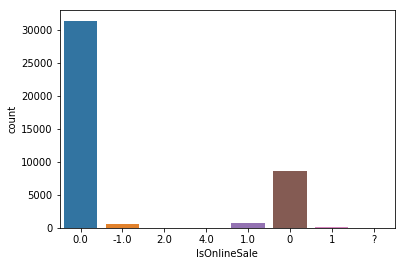

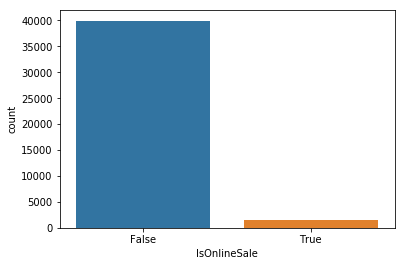

In [11]:
# Online sales has a lot of wierd values
c_name = "IsOnlineSale"

dg = sns.countplot(data=df, x=c_name)
plt.show()

df[c_name] = df[c_name].mask(df[c_name] == 0.0, "0")
df[c_name] = np.where(df[c_name] == "0", False, True)

dg = sns.countplot(data=df, x=c_name)
plt.show()

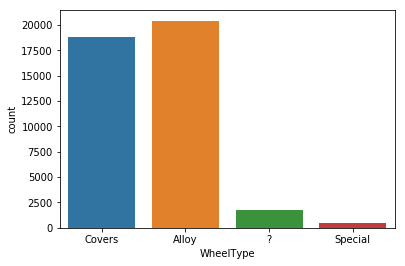

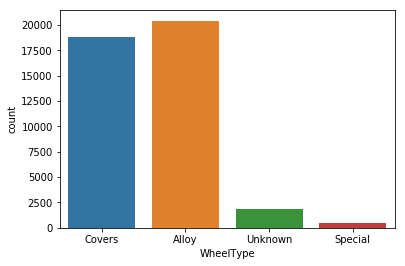

In [12]:
# Wheeltype has nan values
c_name = "WheelType"

dg = sns.countplot(data=df, x=c_name)
plt.show()

df[c_name] = df[c_name].mask(df[c_name] == "?", "Unknown")
df[c_name] = df[c_name].fillna("Unknown")

dg = sns.countplot(data=df, x=c_name)
plt.show()

In [13]:
# IsBadBuy should be bool
c_name = "IsBadBuy"
df[c_name].unique()
df[c_name] = df[c_name].astype(bool)
df[c_name].unique()

array([False,  True])

#### (3) Can you identify any clear patterns by initial exploration of the data using histogram or box plot?

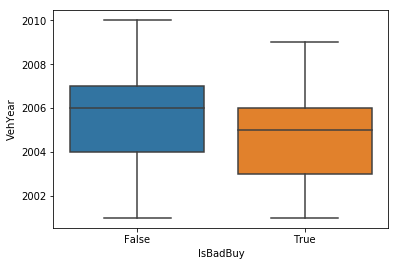

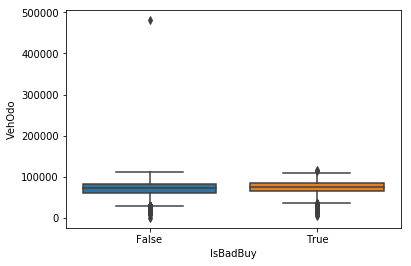

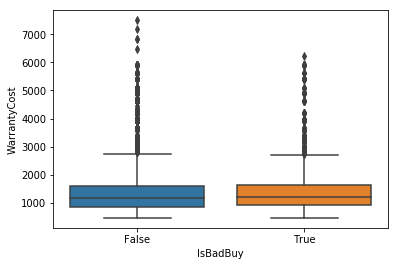

In [14]:
columns = ['VehYear', 'VehOdo', 'WarrantyCost']

for c_name in columns:
    ax = sns.boxplot(x="IsBadBuy", y=c_name, data=df)
    plt.show()

In [ ]:
columns = ['Auction', 'Make', 'Transmission', 'Nationality', 'WheelType', 'Size']

for c_name in columns:
    dg = sns.countplot(data=df, x=c_name)
    plt.show()

In [74]:
# Use this to look more into details on a specific value
column_name = "MMRCurrentAuctionCleanPrice"

print("Describe the column:\n")
print(df[c_name].describe())
print("\n############################")

print("Unique values in the column:\n")
print(df[c_name].unique())
print("############################")

print("Number count:\n")
print(df[c_name].value_counts())

Describe the column:

count    41416.000000
mean      6133.973513
std       2482.294827
min          0.000000
25%       4273.000000
50%       6105.000000
75%       7783.000000
max      33543.000000
Name: MMRAcquisitionAuctionAveragePrice, dtype: float64

############################
Unique values in the column:

[8566. 8835. 7165. ... 9842. 1996. 7535.]
############################
Number count:

0.0        509
5480.0     205
6311.0      96
7811.0      79
7644.0      74
7991.0      72
5569.0      71
4573.0      67
7245.0      62
6858.0      57
7960.0      57
8196.0      53
6892.0      52
5427.0      52
7293.0      51
3688.0      50
7048.0      48
7533.0      45
7513.0      45
6820.0      43
7314.0      42
7541.0      42
5500.0      41
8268.0      41
8194.0      41
6733.0      40
5443.0      38
7171.0      37
6867.0      37
8012.0      36
          ... 
9121.0       1
2425.0       1
10415.0      1
9208.0       1
2323.0       1
9604.0       1
2950.0       1
11508.0      1
2163.0       1


#### (4) What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.

#### (5) What distribution scheme did you use? What data partitioning allocation did you set? Explain your selection. 

# Predictive Modeling using Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [46]:
# RESET POINT for PREDICTIVE MODELING USING REGRESSION
df = pd.read_csv('./data.csv')

c_name = "VehYear"
df[c_name] = df[c_name].fillna(0).astype(int)
df = df[df[c_name] != 0]

c_name = "Transmission"
df[c_name] = df[c_name].mask(df[c_name] == "Manual", "MANUAL")
df[c_name] = df[c_name].mask(df[c_name] == 0.0, "0")

c_name = "IsOnlineSale"
df[c_name] = np.where(df[c_name] == "0", False, True)

c_name = "WheelType"
df[c_name] = df[c_name].mask(df[c_name] == "?", "Unknown")
df[c_name] = df[c_name].fillna("Unknown")

df.drop(['PurchaseID','PurchaseTimestamp','PurchaseDate','WheelTypeID','PRIMEUNIT','AUCGUART','ForSale'],axis=1,inplace=True)

c_name = "IsBadBuy"
df[c_name] = df[c_name].astype(bool)


collection = ["MMRAcquisitionAuctionAveragePrice",
              "MMRAcquisitionAuctionCleanPrice",
              "MMRAcquisitionRetailAveragePrice",
              "MMRAcquisitonRetailCleanPrice",
              "MMRCurrentAuctionAveragePrice",
              "MMRCurrentAuctionCleanPrice",
              "MMRCurrentRetailAveragePrice",
              "MMRCurrentRetailCleanPrice",
              "MMRCurrentRetailRatio"]

for c_name in collection:
    df[c_name] = df[c_name].mask(df[c_name] == "?", 0)
    df[c_name] = df[c_name].mask(df[c_name] == "#VALUE!", 0)
    df[c_name] = pd.to_numeric(df[c_name])
    df[c_name] = df[c_name].mask(df[c_name] == 1, 0)

df.drop(['Color','Auction','Make','WheelType','Nationality', 'TopThreeAmericanName'],axis=1,inplace=True)
    
print(df.info())

C:\Users\Schmidt\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41432 entries, 0 to 41475
Data columns (total 18 columns):
VehYear                              41432 non-null int32
Transmission                         41432 non-null object
VehOdo                               41432 non-null float64
Size                                 41432 non-null object
MMRAcquisitionAuctionAveragePrice    41416 non-null float64
MMRAcquisitionAuctionCleanPrice      41429 non-null float64
MMRAcquisitionRetailAveragePrice     41429 non-null float64
MMRAcquisitonRetailCleanPrice        41327 non-null float64
MMRCurrentAuctionAveragePrice        41429 non-null float64
MMRCurrentAuctionCleanPrice          41429 non-null float64
MMRCurrentRetailAveragePrice         41409 non-null float64
MMRCurrentRetailCleanPrice           41409 non-null float64
MMRCurrentRetailRatio                41116 non-null float64
VNST                                 41432 non-null object
VehBCost                             41432 non-null obje

#### (1) In preparation for regression, is any imputation of missing values needed for this data set? List the variables that did.

> 509 cars need MMR___ information
> 44 cars have already been removed due to missing information (year)

In [54]:
print("\nThe following columns still have missing values:")
nan_list = list()
for c_name in list(df):
    if(df[c_name].isnull().values.any()):
        nan_list.append(c_name)
        print(c_name)
        
print("\n Dropping columns with NaN values.")
df = df.dropna(subset=nan_list) 


The following columns still have missing values:
MMRAcquisitionAuctionAveragePrice
MMRAcquisitionAuctionCleanPrice
MMRAcquisitionRetailAveragePrice
MMRAcquisitonRetailCleanPrice
MMRCurrentAuctionAveragePrice
MMRCurrentAuctionCleanPrice
MMRCurrentRetailAveragePrice
MMRCurrentRetailCleanPrice
MMRCurrentRetailRatio

 Dropping columns with NaN values.


#### (2) Apply transformation method(s) to the variable(s) that need it. List the variables that needed it

#### (3) Build a regression model using the default regression method with all inputs.
Once you done it, build another one and tune it using GridSearchCV. Answer the followings:
Name the regression function used.
- How much was the difference in performance of two models build, default and optimal?
- Show the set parameters for the best model. What are the parameters used? Explain your decision. List the optimal parameters.
- Report which variables are included in the regression model.
- Report the top-5 important variables (in the order) in the model.
- What is classification accuracy on training and test datasets?
- Report any sign of overfitting

In [55]:
df_dummies = pd.get_dummies(df)
print(df.info())
print("\n#################\n")
print(df_dummies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41002 entries, 0 to 41475
Data columns (total 18 columns):
VehYear                              41002 non-null int32
Transmission                         41002 non-null object
VehOdo                               41002 non-null float64
Size                                 41002 non-null object
MMRAcquisitionAuctionAveragePrice    41002 non-null float64
MMRAcquisitionAuctionCleanPrice      41002 non-null float64
MMRAcquisitionRetailAveragePrice     41002 non-null float64
MMRAcquisitonRetailCleanPrice        41002 non-null float64
MMRCurrentAuctionAveragePrice        41002 non-null float64
MMRCurrentAuctionCleanPrice          41002 non-null float64
MMRCurrentRetailAveragePrice         41002 non-null float64
MMRCurrentRetailCleanPrice           41002 non-null float64
MMRCurrentRetailRatio                41002 non-null float64
VNST                                 41002 non-null object
VehBCost                             41002 non-null obje

In [56]:
rs = 10

target = "IsBadBuy"
# train test split
y = df_dummies[target]
X = df_dummies.drop([target], axis=1)
X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

C:\Users\Schmidt\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [57]:
# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 2001, max 2010, mean 2005.36 and std dev 1.73
Variable #1: min 4825.0, max 480444.0, mean 71370.15 and std dev 14799.34
Variable #2: min 0.0, max 33543.0, mean 6170.75 and std dev 2429.25
Variable #3: min 0.0, max 36701.0, mean 7419.52 and std dev 2678.76
Variable #4: min 0.0, max 36726.0, mean 8497.13 and std dev 3098.97


C:\Users\Schmidt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Schmidt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


After scaling
-------------
Variable #0: min -2.522907614609678, max 2.681367536898907, mean -0.00 and std dev 1.00
Variable #1: min -4.496493460647713, max 27.64135302774379, mean -0.00 and std dev 1.00
Variable #2: min -2.5401845523085256, max 11.26777666945196, mean 0.00 and std dev 1.00
Variable #3: min -2.7697575711986517, max 10.930983966781426, mean -0.00 and std dev 1.00
Variable #4: min -2.7419180917762818, max 9.109110399684452, mean 0.00 and std dev 1.00


C:\Users\Schmidt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [58]:
# fit it to training data
model = LogisticRegression(random_state=rs)
model.fit(X_train, y_train)

C:\Users\Schmidt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.8745339883627749
Test accuracy: 0.8647264450044712
              precision    recall  f1-score   support

       False       0.87      0.99      0.93     10711
        True       0.29      0.03      0.06      1590

   micro avg       0.86      0.86      0.86     12301
   macro avg       0.58      0.51      0.49     12301
weighted avg       0.80      0.86      0.81     12301

